In [68]:
# code for loading in data set from:
# https://pythonbasics.org/how-to-load-machine-learning-data-in-python/
import numpy as np
import matplotlib.pyplot as plt
import copy
filename = 'Data/CS170_Small_Data__82.txt'
raw_data = open(filename, 'rt')
data = np.loadtxt(raw_data)
print(data.shape)
print(data)

(500, 7)
[[ 2.         -0.63742821 -0.3877098  ... -0.78912863 -1.0888035
   0.33726993]
 [ 2.         -0.10508566  1.5406805  ...  1.173381   -0.30325924
   1.0776392 ]
 [ 2.         -0.83025536  1.3045544  ...  0.06139414  0.17492874
  -1.4731397 ]
 ...
 [ 2.         -0.43517064  1.077989   ... -0.69252039 -0.97886516
  -0.53556053]
 [ 1.          0.29658063 -0.89554223 ...  0.48519201  0.51102218
   0.77067154]
 [ 1.          0.56477704  1.713623   ... -0.73334086 -1.5821675
   0.55436715]]


In [139]:
def MakePlot(accuracies,feature_sets):
    fig, ax = plt.subplots()
    ax.bar(range(len(feature_sets)), accuracies, width=0.5)
    plt.xticks(range(len(feature_sets)), feature_sets)
    plt.ylabel('Accuracy')
    plt.xlabel('Feature Set')
    fig.autofmt_xdate()
    if len(str(feature_sets[0])) < len(str(feature_sets[1])):
        plt.title('Forward Feature Search')
    else:
        plt.title('Backward Feature Search')
    plt.show()

def LeaveOneOutCrossValid(data, current_set, feature_to_add_or_remove, search_method):
    # Leave one out cross validation, returns the accuracy
    rows = data.shape[0]
    cols = data.shape[1]
    # zero columns
    if search_method == "forward":
        # zero out the columns that do not contain features in the current set and the feature to add
        for feature in range(1,cols):
            if (feature not in current_set) and (feature != feature_to_add_or_remove):
                data[:,feature] = 0
    elif search_method == "backward":
        # zero out the columns that contain the feature to remove and the features that are not in the current set
        for feature in range(1, cols):
            if (feature not in current_set) or (feature == feature_to_add_or_remove):
                data[:,feature] = 0  
    else:
        return 0

    NumCorrect = 0
    for i in range(rows):
        ObjToClassify = data[i,1:]
        LabelObjToClassify = data[i,0]
        #print(f"Looping over i, at the {i} location")
        #print(f"The {i}'th object is in class {LabelObjToClassify}")
        NearestNeighborDistance = np.inf
        NearestNeighborLocation = np.inf
        for k in range(rows):
            if not k == i: # except self
                distance = np.sqrt(np.sum((ObjToClassify - data[k,1:]) ** 2))
                if distance < NearestNeighborDistance:
                    NearestNeighborDistance = distance
                    NearestNeighborLocation = k
                    NearestNeighborLabel = data[NearestNeighborLocation,0]
                    #print(f"Ask if {i} is nearest neighbor with {k}")
                    #print("Distance: ", distance)
        if LabelObjToClassify == NearestNeighborLabel:
            NumCorrect = NumCorrect + 1
    
    accuracy = NumCorrect / rows
        #print(f"Object {i} is class {LabelObjToClassify}")
        #print(f"Its nearest neighbor is {NearestNeighborLocation} which is class {NearestNeighborLabel}")
    return accuracy

def forward_feature_search(data):
    CurrentSet = set()
    BestAcc = 0
    # Deafult rate
    Data = copy.deepcopy(data)
    default_acc = LeaveOneOutCrossValid(Data, CurrentSet, None, "forward")
    accuracies = [default_acc]
    feature_sets = ['{}']

    for i in range(1, data.shape[1]):
        #print(f"On the {i}th level of the search tree")
        FeatureToAddAtThisLevel = set()
        BestSoFarAccuracy = 0
        
        for k in range(1, data.shape[1]):
            if not CurrentSet.intersection(set({k})):
                #print(f"--Considering adding feature {k}")
                # to create columns of zeros without affecting the original array
                Data = copy.deepcopy(data)
                #accuracy = LeaveOneOutCrossValid(Data, CurrentSet, k+1)
                accuracy = LeaveOneOutCrossValid(Data, CurrentSet, k, "forward")
                #print(f"accuracy of feature {CurrentSet} + feature {k} = : {accuracy}")

                if accuracy > BestSoFarAccuracy:
                    BestSoFarAccuracy = accuracy
                    FeatureToAddAtThisLevel = k
                    BestAcc = accuracy
                    #print(CurrentSet)
        #print(CurrentSet)
        #print(feature_sets)
        CurrentSet.add(FeatureToAddAtThisLevel) 
        print(f"On level {i} i added feature {FeatureToAddAtThisLevel} to current set")
        print(f"Current Set: {CurrentSet}")
        print(f"Accuracy: {BestAcc}")
        accuracies.append(BestAcc)
        feature_sets.append(CurrentSet.copy())
    
    MakePlot(accuracies, feature_sets)

def backward_feature_search(data):
    features = [x for x in range(1, data.shape[1])] 
    CurrentSet = set(features)
    BestAcc = 0
    # Deafult rate
    Data = copy.deepcopy(data)
    default_acc = LeaveOneOutCrossValid(Data, CurrentSet, None, "backward")
    accuracies = [default_acc]
    feature_sets = [str(CurrentSet.copy())]

    for i in range(1, data.shape[1]):
        #print(f"On the {i}th level of the search tree")

        # The logic should be, feature to remove at this level        
        FeatureToRemoveAtThisLevel = set()
        #if i == 1:
        #    Data = copy.deepcopy(data)
        #    BestSoFarAccuracy = LeaveOneOutCrossValid(Data, CurrentSet, None, "backward")
        #else: 
        BestSoFarAccuracy = 0
        for k in range(1, data.shape[1]):
            if k in CurrentSet:
            #if CurrentSet.intersection(set({k})):
                #print(f"--Considering removing feature {k}")
                # to create columns of zeros without affecting the original array
                Data = copy.deepcopy(data)
                accuracy = LeaveOneOutCrossValid(Data, CurrentSet, k, "backward")
                #print(f"accuracy of feature {CurrentSet} - feature {k} = : {accuracy}")

                if accuracy > BestSoFarAccuracy:
                    BestSoFarAccuracy = accuracy
                    FeatureToRemoveAtThisLevel = k
                    BestAcc = accuracy
                    #print(CurrentSet)
        CurrentSet.remove(FeatureToRemoveAtThisLevel) 
        print(f"On level {i} i removed feature {FeatureToRemoveAtThisLevel} from current set")
        print(f"Current Set: {CurrentSet}")
        print(f"Accuracy: {BestAcc}")
        accuracies.append(BestAcc)
        if len(CurrentSet) != 0:
            feature_sets.append(CurrentSet.copy())
        else:
            feature_sets.append('{}')
        print(feature_sets)
    print(len(accuracies),len(feature_sets))

    MakePlot(accuracies,feature_sets)

In [ ]:
#feature_search(data)
LeaveOneOutCrossValid(data,0,0)

In [ ]:
#filename = 'Data/SampleData/CS170_SMALLtestdata__1.txt'
#filename = 'Data/SampleData/Sue/CS170_Small_Data__96.txt'
#filename = 'Data/SampleData/Joe/CS170_Small_Data__6.txt'
filename = 'Data/SampleData/Van/CS170_Small_Data__88.txt'
Raw_data = open(filename, 'rt')
Data = np.loadtxt(Raw_data)
#print(Data.shape)
#print(Data)

On level 1 i added feature 5 to current set
Current Set: {5}
Accuracy: 0.838
On level 2 i added feature 1 to current set
Current Set: {1, 5}
Accuracy: 0.964
On level 3 i added feature 2 to current set
Current Set: {1, 2, 5}
Accuracy: 0.936
On level 4 i added feature 3 to current set
Current Set: {1, 2, 3, 5}
Accuracy: 0.884
On level 5 i added feature 4 to current set
Current Set: {1, 2, 3, 4, 5}
Accuracy: 0.834
On level 6 i added feature 6 to current set
Current Set: {1, 2, 3, 4, 5, 6}
Accuracy: 0.794


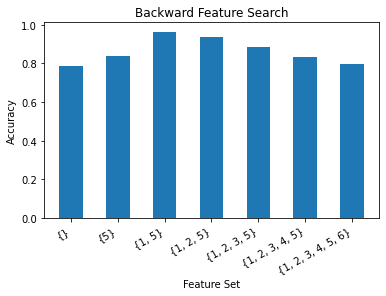

In [138]:
# testing forward feature search
forward_feature_search(Data)

On level 1 i removed feature 6 from current set
Current Set: {1, 2, 3, 4, 5}
Accuracy: 0.834
['{1, 2, 3, 4, 5, 6}', {1, 2, 3, 4, 5}]
On level 2 i removed feature 3 from current set
Current Set: {1, 2, 4, 5}
Accuracy: 0.884
['{1, 2, 3, 4, 5, 6}', {1, 2, 3, 4, 5}, {1, 2, 4, 5}]
On level 3 i removed feature 4 from current set
Current Set: {1, 2, 5}
Accuracy: 0.936
['{1, 2, 3, 4, 5, 6}', {1, 2, 3, 4, 5}, {1, 2, 4, 5}, {1, 2, 5}]
On level 4 i removed feature 2 from current set
Current Set: {1, 5}
Accuracy: 0.964
['{1, 2, 3, 4, 5, 6}', {1, 2, 3, 4, 5}, {1, 2, 4, 5}, {1, 2, 5}, {1, 5}]
On level 5 i removed feature 1 from current set
Current Set: {5}
Accuracy: 0.838
['{1, 2, 3, 4, 5, 6}', {1, 2, 3, 4, 5}, {1, 2, 4, 5}, {1, 2, 5}, {1, 5}, {5}]
On level 6 i removed feature 5 from current set
Current Set: set()
Accuracy: 0.786
['{1, 2, 3, 4, 5, 6}', {1, 2, 3, 4, 5}, {1, 2, 4, 5}, {1, 2, 5}, {1, 5}, {5}, '{}']
7 7
[0.794, 0.834, 0.884, 0.936, 0.964, 0.838, 0.786]
['{1, 2, 3, 4, 5, 6}', {1, 2, 3, 4

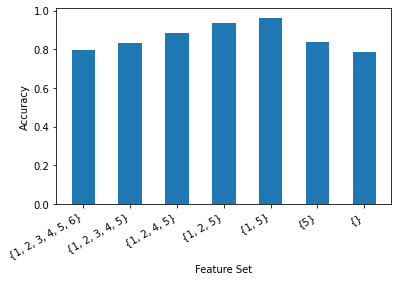

In [136]:
# testing backward feature search
backward_feature_search(Data)